In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Handling Data
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.pipeline import Pipeline # Data Pipeline
from sklearn.impute import SimpleImputer # Imputation / Handling missing values
from sklearn.preprocessing import StandardScaler # Scalling data
from sklearn.feature_selection import SelectKBest # Selecting features
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.model_selection import train_test_split # splitting data
from sklearn.ensemble import RandomForestClassifier # Classifier
from sklearn.neighbors import KNeighborsClassifier # Classifier from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier # Feature selection
from sklearn.metrics import classification_report, confusion_matrix #␣Performance Measures
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning
from scipy.stats import randint # Random Integer
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
corr = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']].corr()['Outcome'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


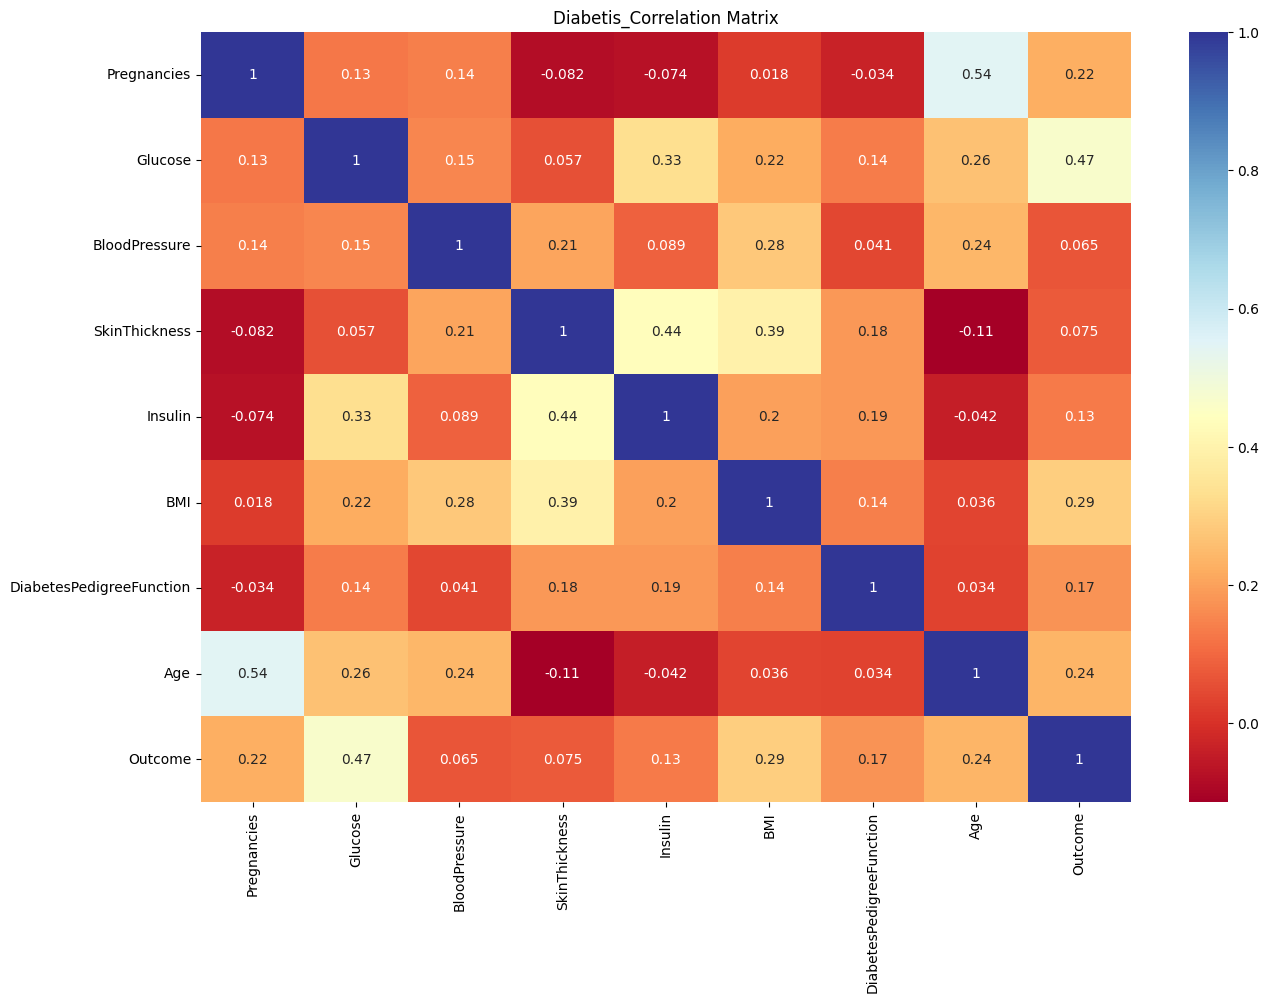

In [8]:
corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'RdYlBu')
plt.title('Diabetis_Correlation Matrix')
plt.show()

In [9]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

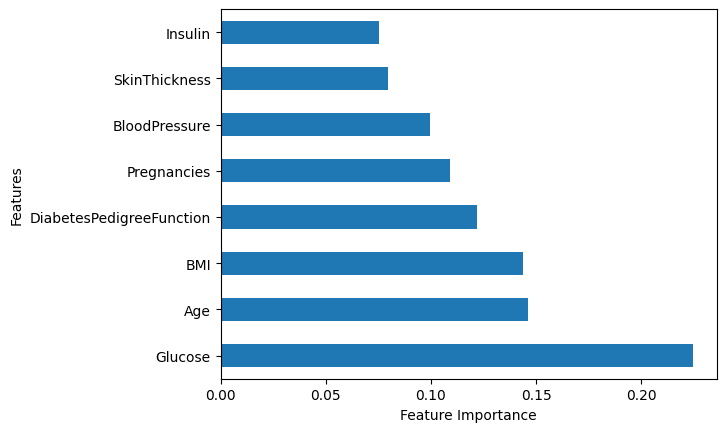

In [10]:
feat_selection=ExtraTreesClassifier()
feat_selection.fit(X,y)
feat_importances=pd.Series(feat_selection.feature_importances_,index=X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [11]:
feat_importances.sort_values(ascending = False)

Glucose                     0.224585
Age                         0.146072
BMI                         0.143624
DiabetesPedigreeFunction    0.122050
Pregnancies                 0.109122
BloodPressure               0.099586
SkinThickness               0.079773
Insulin                     0.075187
dtype: float64

In [12]:
X = df[feat_importances[:6].index]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 23)

In [25]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
714,3,102,74,0,0,29.5
302,5,77,82,41,42,35.8
133,8,84,74,31,0,38.3
728,2,175,88,0,0,22.9
558,11,103,68,40,0,46.2


In [24]:
feat_importances[:6]

Pregnancies      0.109122
Glucose          0.224585
BloodPressure    0.099586
SkinThickness    0.079773
Insulin          0.075187
BMI              0.143624
dtype: float64

In [13]:
neighbors = np.arange(1, 35)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [14]:
print(f'Train Accuracies: \n{train_accuracies}\n\nTest Accuracies:\n{test_accuracies}')

Train Accuracies: 
{1: 1.0, 2: 0.8159609120521173, 3: 0.8208469055374593, 4: 0.7980456026058632, 5: 0.7899022801302932, 6: 0.7752442996742671, 7: 0.7687296416938111, 8: 0.762214983713355, 9: 0.7638436482084691, 10: 0.7687296416938111, 11: 0.7866449511400652, 12: 0.7801302931596091, 13: 0.7899022801302932, 14: 0.7736156351791531, 15: 0.7654723127035831, 16: 0.7671009771986971, 17: 0.7768729641693811, 18: 0.7654723127035831, 19: 0.7654723127035831, 20: 0.760586319218241, 21: 0.762214983713355, 22: 0.747557003257329, 23: 0.749185667752443, 24: 0.749185667752443, 25: 0.741042345276873, 26: 0.745928338762215, 27: 0.752442996742671, 28: 0.747557003257329, 29: 0.754071661237785, 30: 0.749185667752443, 31: 0.755700325732899, 32: 0.745928338762215, 33: 0.750814332247557, 34: 0.737785016286645}

Test Accuracies:
{1: 0.6688311688311688, 2: 0.7272727272727273, 3: 0.6948051948051948, 4: 0.7272727272727273, 5: 0.7337662337662337, 6: 0.7467532467532467, 7: 0.7337662337662337, 8: 0.7207792207792207, 9

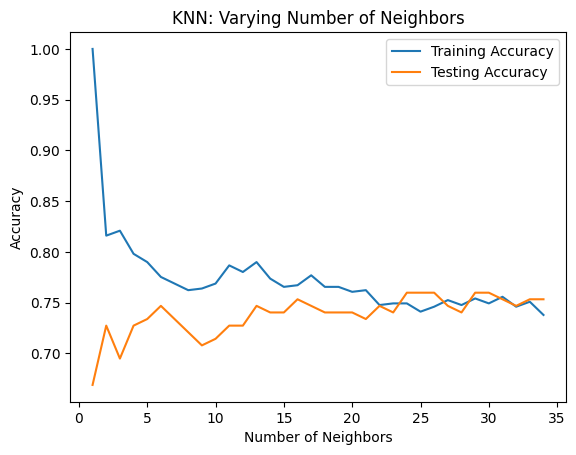

In [15]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [16]:
model = KNeighborsClassifier(n_neighbors = 33)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}')

Train Accuracy: 0.750814332247557
Test Accuracy: 0.7532467532467533


In [17]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score ='accuracy', n = 5):
    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,param_grid = param_grid,scoring = score,cv = n)
    # Fit the data
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')
    # best estimator
    best_estimator = grid_search.best_estimator_
    return best_estimator

In [18]:
param_grid = {
'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25,27,29,31,33],
'weights': ['uniform', 'distance'],
'metric': ['euclidian', 'manhattan']
}
best_estimator = hyperparameter_tunning(model, X_train, y_train, param_grid,score = 'accuracy', n = 5)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'distance'} 

Best score: 0.7328401972544316


In [19]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 21, weights='uniform')
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.7654723127035831

In [20]:
param_grid = {
'max_depth': [3, 5, 7, None], # Maximum depth of the tree
'min_samples_split': [2, 5, 10], # Minimum number of samples required to␣split an internal node
 'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
 }
clf = DecisionTreeClassifier(random_state=42)

In [21]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.7532467532467533


In [22]:
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf =1,min_samples_split= 2)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7532467532467533

In [23]:
import pickle
with open('diabetesmodel.pickle','wb') as fp:
    pickle.dump(dt,fp)
    